In [3]:
run decentralized_vfi_numba.py

In [8]:
model = create_overborrowing_model()
σ, η, β, ω, κ, R, b_grid, y_nodes, b_size, y_size, Q = model
H = solve_for_equilibrium(model, α=0.5, tol=0.01)

VFI terminated after 125 iterations.
Updated H at iteration 0 with error 0.41.
VFI terminated after 125 iterations.
Updated H at iteration 1 with error 0.23398989898989908.
VFI terminated after 125 iterations.
Updated H at iteration 2 with error 0.11699494949494949.
VFI terminated after 125 iterations.
Updated H at iteration 3 with error 0.0584974747474748.
VFI terminated after 125 iterations.
Updated H at iteration 4 with error 0.04736742424242424.
VFI terminated after 125 iterations.
Updated H at iteration 5 with error 0.04439078282828279.
VFI terminated after 125 iterations.
Updated H at iteration 6 with error 0.03876104797979796.
VFI terminated after 125 iterations.
Updated H at iteration 7 with error 0.03487847222222229.
VFI terminated after 125 iterations.
Updated H at iteration 8 with error 0.029863478535353538.
VFI terminated after 125 iterations.
Updated H at iteration 9 with error 0.02728318339646474.
VFI terminated after 125 iterations.
Updated H at iteration 10 with error 0

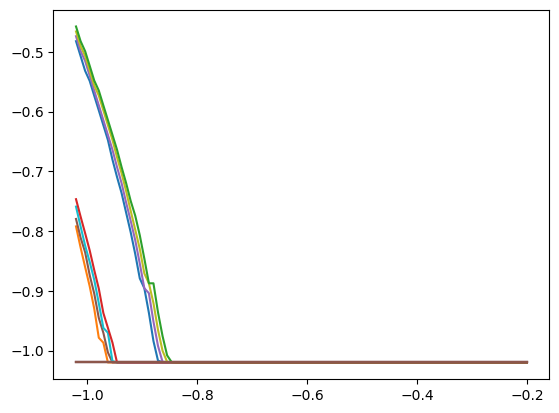

In [9]:
fig, ax = plt.subplots()
for i_y in range(y_size): 
    ax.plot(b_grid, H[:, i_y])
plt.show()

In [6]:
i_y=4
y_t, y_n = y_nodes[i_y]
b_bind = []   # Bp must be greater than constraint
b_max  = []   # Bp must be less than this value to get c >= 0
for i_B, B in enumerate(b_grid):
    Bp = H[i_B, i_y]
    C = R * B + y_t - Bp
    P = ((1 - ω) / ω) * (C / y_n)**(η + 1)
    b_bind.append(- κ * (P * y_n + y_t))
    b_max.append(R * B + y_t)

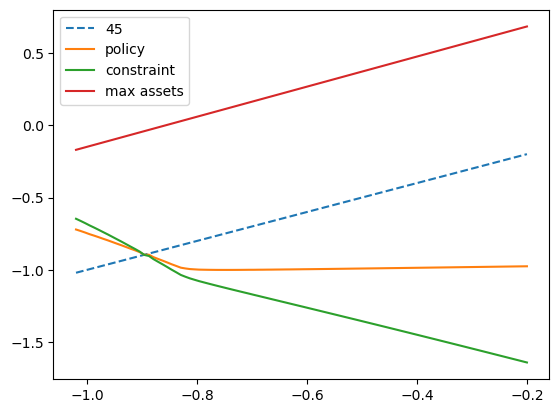

In [7]:
fig, ax = plt.subplots()
ax.plot(b_grid, b_grid, '--', label='45')
ax.plot(b_grid, H[:, i_y], label='policy')
ax.plot(b_grid, b_bind, label='constraint')
ax.plot(b_grid, b_max, label='max assets')
ax.legend()
plt.show()